In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from statsmodels.tsa.arima_model import ARIMA


In [7]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df1 = pd.read_csv("/content/drive/MyDrive/train.csv")
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3887,4013,Mahindra XUV500 W10 2WD,Jaipur,2017,40000,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,15.90
4904,5049,Jeep Compass 2.0 Sport,Kolkata,2017,27000,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.0,18.45 Lakh,15.00
5737,5904,Ford Ecosport 1.5 DV5 MT Titanium,Mumbai,2015,44000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,7.35
2774,2863,Audi A6 2011-2015 2.0 TDI,Coimbatore,2013,70998,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.57
148,156,Volkswagen Polo Diesel Trendline 1.2L,Jaipur,2012,65634,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,3.50


<Figure size 1000x1000 with 0 Axes>

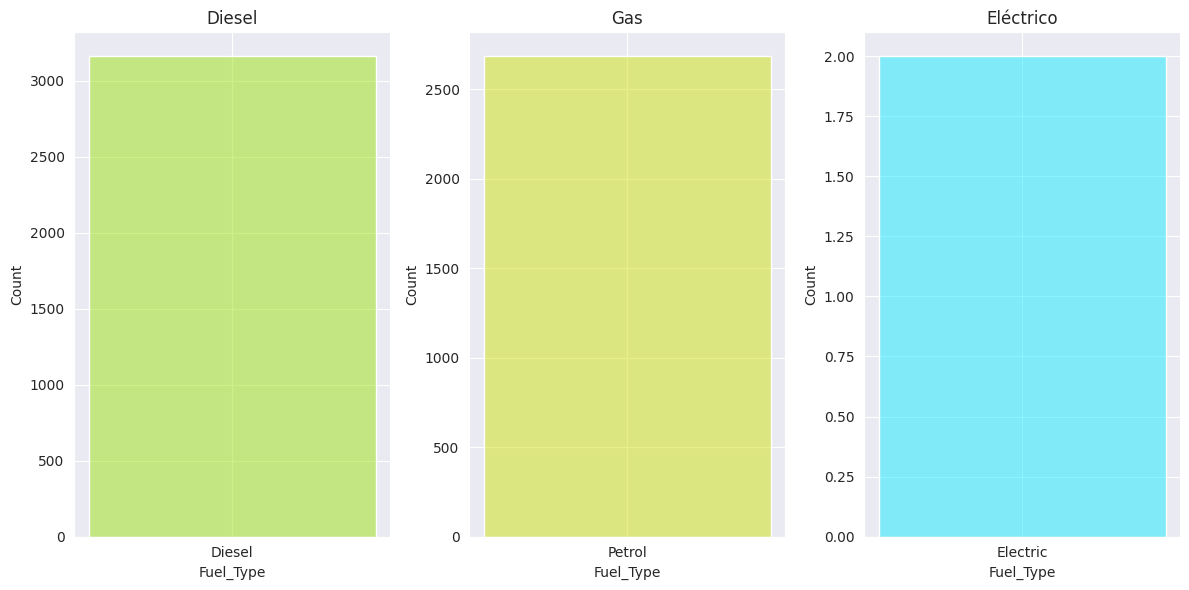

In [8]:
plt.figure(figsize=(10,10))

df_diesel = df[df["Fuel_Type"] == "Diesel"]
df_gas = df[df["Fuel_Type"] == "Petrol"]
df_electric = df[df["Fuel_Type"] == "Electric"]

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(df_diesel, x="Fuel_Type", kde=True, color="#9EE315")
    plt.title("Diesel")

    plt.subplot(1, 3, 2)
    sns.histplot(df_gas, x="Fuel_Type", kde=True, color="#D0E312")
    plt.title("Gas")

    plt.subplot(1, 3, 3)
    sns.histplot(df_electric, x="Fuel_Type", kde=True, color='#17EAFF')
    plt.title("Eléctrico")

    plt.tight_layout()
    plt.show()

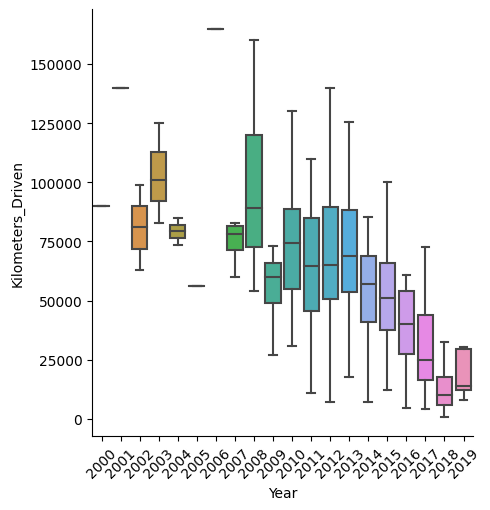

In [9]:
df_random = df.sample(n=300, random_state=1)

graphic = sns.catplot(df_random, y="Kilometers_Driven", x="Year", kind="box", showfliers=False)
graphic.set_xticklabels(rotation=45)

plt.show()

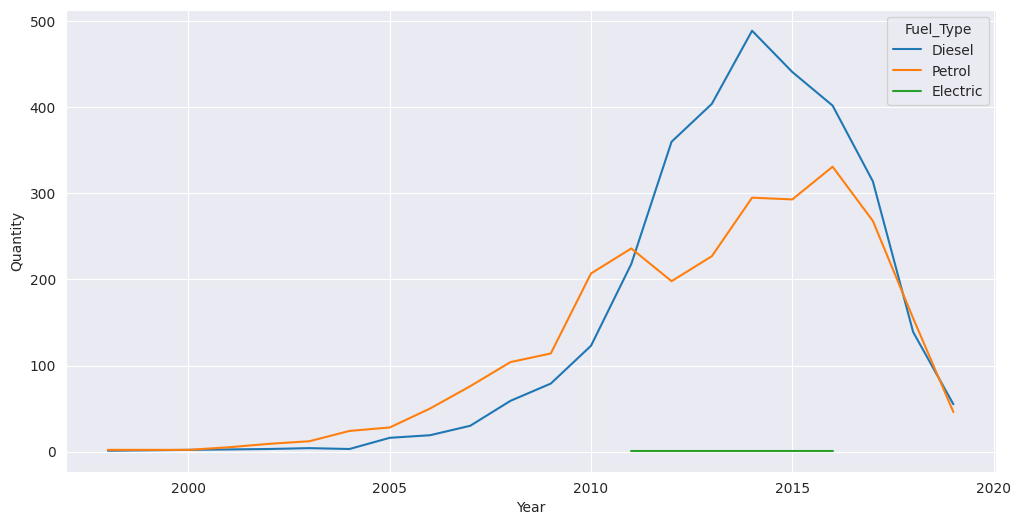

In [10]:
plt.figure(figsize=(12, 6))

df_diesel = df[df["Fuel_Type"] == "Diesel"]
df_gas = df[df["Fuel_Type"] == "Petrol"]
df_electric = df[df["Fuel_Type"] == "Electric"]

with sns.axes_style("darkgrid"):
    fuel_counts = df.groupby(['Year', 'Fuel_Type']).size().reset_index(name='Count')

    sns.lineplot(data=fuel_counts, x='Year', y='Count', hue='Fuel_Type')

    plt.xlabel('Year')
    plt.ylabel('Quantity')

    plt.show()

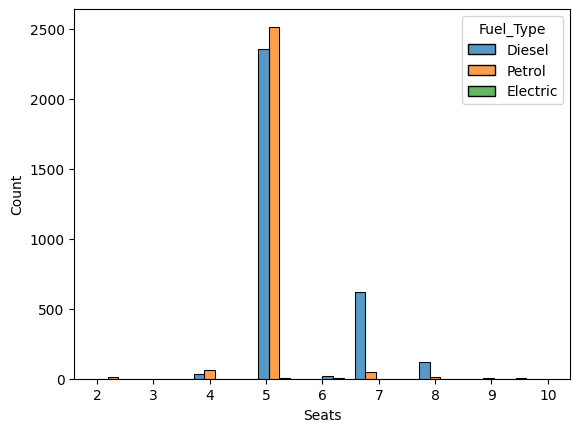

In [11]:
sns.histplot(df, x="Seats", hue="Fuel_Type", multiple="dodge")
plt.show()

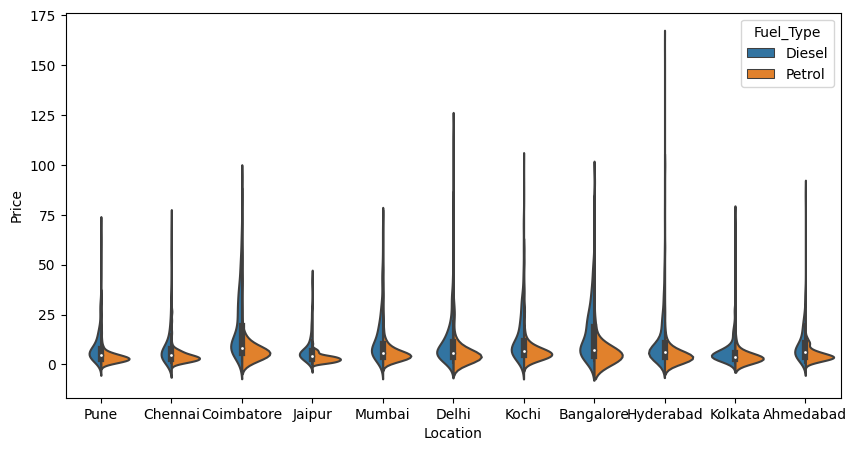

In [12]:
df_diesel_petrol = pd.concat([df_diesel, df_gas], axis=0)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

graphic = sns.violinplot(df_diesel_petrol, x="Location", y="Price", hue="Fuel_Type", ax=axes, showfliers=False, split=True)
plt.show()

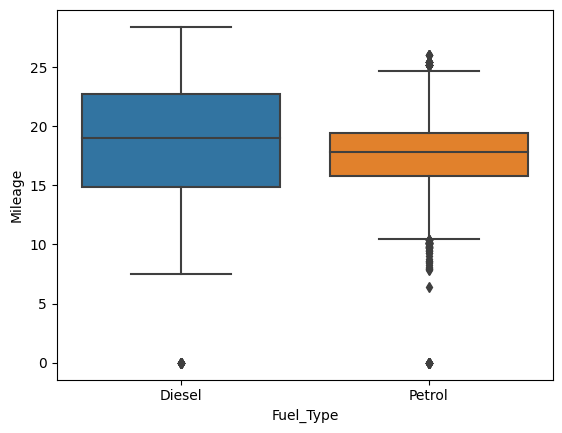

In [13]:
df_diesel_petrol['Mileage'] = df_diesel_petrol['Mileage'].astype(str)

df_diesel_petrol['Mileage'] = df_diesel_petrol['Mileage'].str.extract('(\d+\.\d+)').astype(float)


sns.boxplot(df_diesel_petrol, x="Fuel_Type", y="Mileage")
plt.show()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [15]:
df1.value_counts("Name")

Name
Mahindra XUV500 W8 2WD                           49
Maruti Swift VDI                                 45
Maruti Swift Dzire VDI                           34
Honda City 1.5 S MT                              34
Maruti Ritz VDi                                  30
                                                 ..
Mahindra Scorpio 1.99 S8                          1
Mahindra Scorpio 2009-2014 LX 2WD 7S              1
Mahindra Scorpio 2009-2014 VLX 2WD 7S BSIV        1
Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV     1
Volvo XC90 2007-2015 D5 AWD                       1
Length: 1804, dtype: int64

In [16]:
cat_columns = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type"]

le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])


del_columns = ["Unnamed: 0", "New_Price"]

df = df.drop(del_columns, axis=1)


expreg_col = ["Mileage", "Power", "Engine"]

for col in expreg_col:
    df[col] = df[col].str.extract('(\d+\.\d+|\d+)').astype(float)
    df[col].fillna(df[col].mean(), inplace=True)

df['Seats'].fillna(df['Seats'].mean(), inplace=True)
df.isnull().sum()

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,502,10,2015,41000,0,1,0,19.67,1582.0,126.20,5.0,12.50
1,477,2,2011,46000,2,1,0,13.00,1199.0,88.70,5.0,4.50
2,1014,2,2012,87000,0,1,0,20.77,1248.0,88.76,7.0,6.00
3,22,3,2013,40670,0,0,2,15.20,1968.0,140.80,5.0,17.74
4,1317,6,2013,86999,0,1,0,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5842,1109,4,2014,27365,0,1,0,28.40,1248.0,74.00,5.0,4.75
5843,638,6,2015,100000,0,1,0,24.40,1120.0,71.00,5.0,4.00
5844,898,6,2012,55000,0,1,2,14.00,2498.0,112.00,8.0,2.90
5845,1149,8,2013,46000,2,1,0,18.90,998.0,67.10,5.0,2.65


In [17]:
x = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

Model: LinearRegression
Mean Absolute Error (MAE): 3.65
Mean Squared Error (MSE): 31.72
R-squared (R^2): 0.73
----------------------------------------
Model: Ridge
Mean Absolute Error (MAE): 3.65
Mean Squared Error (MSE): 31.72
R-squared (R^2): 0.73
----------------------------------------
Model: Lasso
Mean Absolute Error (MAE): 3.71
Mean Squared Error (MSE): 33.96
R-squared (R^2): 0.71
----------------------------------------
Model: ElasticNet
Mean Absolute Error (MAE): 3.70
Mean Squared Error (MSE): 33.71
R-squared (R^2): 0.71
----------------------------------------
Model: BayesianRidge
Mean Absolute Error (MAE): 3.65
Mean Squared Error (MSE): 31.71
R-squared (R^2): 0.73
----------------------------------------
Model: HuberRegressor
Mean Absolute Error (MAE): 3.74
Mean Squared Error (MSE): 43.74
R-squared (R^2): 0.63
----------------------------------------
Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 2.10
Mean Squared Error (MSE): 29.82
R-squared (R^2): 0.74
------------

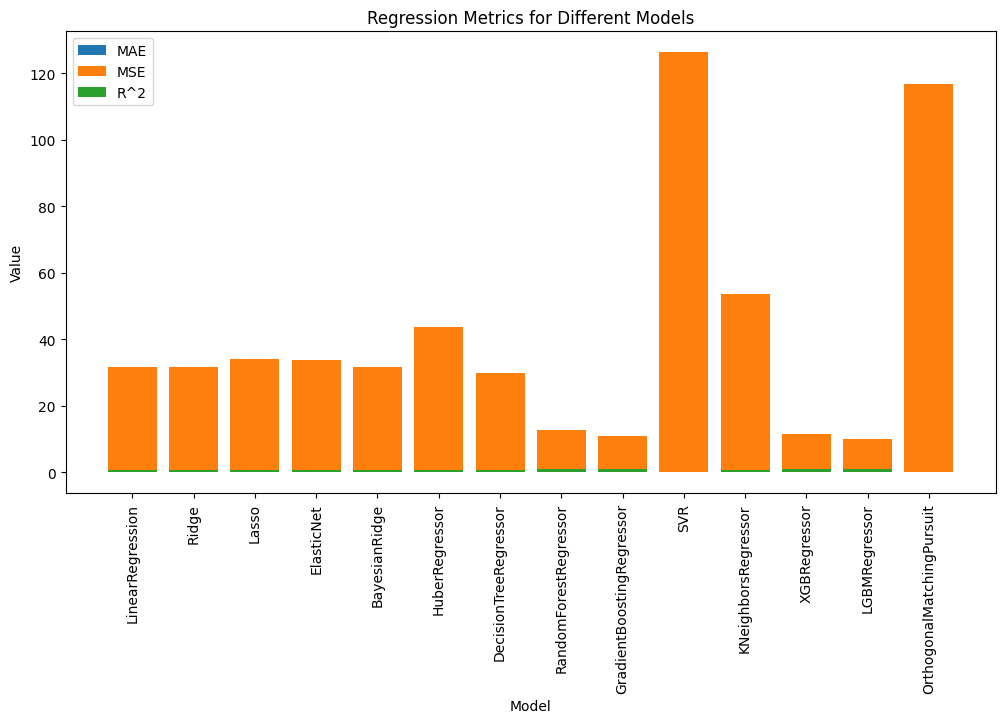

In [19]:
# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    HuberRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    OrthogonalMatchingPursuit()
]

# Create lists to store metrics
model_names = []
mae_values = []
mse_values = []
r2_values = []

# For loop to fit and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_names.append(model_name)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)

    # Print the metrics
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R^2): {r2:.2f}")
    print("-" * 40)

# Plot the metrics
plt.figure(figsize=(12, 6))
plt.bar(model_names, mae_values, label='MAE')
plt.bar(model_names, mse_values, label='MSE')
plt.bar(model_names, r2_values, label='R^2')
plt.legend()
plt.title('Regression Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()